In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read Dataset

data = pd.read_csv('titanic.txt')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Number 1a) Separate X_data and Y_data -> Menentukan Features dan Target y

all_data = [['PassengerId','Pclass','Age','SibSp','Parch','Survived']]
dataset = data[['PassengerId','Pclass','Age','SibSp','Parch']]
target = data[['Survived']]

In [4]:
# 1b) Check NaN Values 

num_vars = dataset.columns[dataset.dtypes != 'object']
dataset[num_vars].isnull().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
dtype: int64

In [ ]:
# Terdapat 177 NaN values didalam column 'Age'

In [5]:
# Calculate mean for every column to later fill the NA values

mean= dataset.mean(axis = 0)

In [6]:
# Input NA values with the mean of continues variable

mean= dataset.mean(axis = 0)
dataset = dataset.fillna(mean)

In [7]:
# Recheck data (Clean from NA Values)

dataset[num_vars].isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
dtype: int64

In [ ]:
# NA values filled

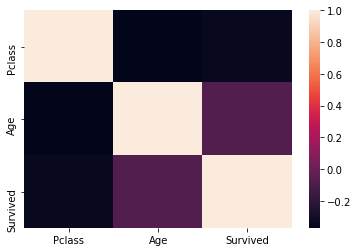

In [8]:
# 1c) Correlation Between 2 - 3 Variables

corr_data = data[['Pclass','Age','Survived']]
correlations = corr_data.corr()
sns.heatmap(correlations,
           xticklabels = correlations.columns,
           yticklabels = correlations.columns)

In [9]:
# Dalam korelasi diatas, kita bisa melihat korelasi lemah antara Kemungkinan Survival dan Umur.

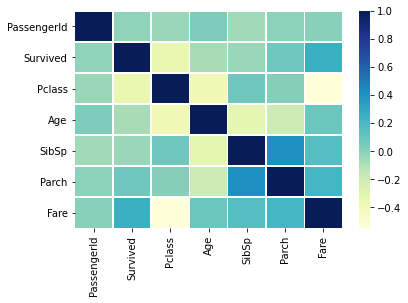

In [10]:
# 1d) Correlation Between Independent Variables and Dependent Variables

correlations = data.corr()
sns.heatmap(correlations,
           xticklabels = correlations.columns,
           yticklabels = correlations.columns,
           cmap="YlGnBu",
           linewidths = 0.5)

In [11]:
# Dari fungsi korelasi data diatas, kita dapat melihat korelasi yang lumayan kuat antara Survived dan Fare. Lalu antara SibSp
# Parch, juga antara Parch dan Fare.

In [12]:
# 2) Data Splitting -> Membagi antara x_train

x_train,x_test,y_train,y_test = train_test_split(dataset,target,test_size = 0.2)
print(x_train)
print(y_train)

     PassengerId  Pclass        Age  SibSp  Parch
331          332       1  45.500000      0      0
412          413       1  33.000000      1      0
366          367       1  60.000000      1      0
149          150       2  42.000000      0      0
399          400       2  28.000000      0      0
..           ...     ...        ...    ...    ...
566          567       3  19.000000      0      0
24            25       3   8.000000      3      1
860          861       3  41.000000      2      0
59            60       3  11.000000      5      2
368          369       3  29.699118      0      0

[712 rows x 5 columns]
     Survived
331         0
412         1
366         1
149         0
399         1
..        ...
566         0
24          0
860         0
59          0
368         1

[712 rows x 1 columns]


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train) #actually produces the linear eqn for the data

LinearRegression()

In [ ]:
# Dalam fungsi LinearRegression(), sudah ada fungsi untuk menentukan weight dan bias, mengkalkulasi error, dan mengupdate weight
# yang sudah dipakai untuk mengurangi error sampai seminimal mungkin.

In [14]:
# 3a) Prediction of passenger survived

y_pred = regressor.predict(x_test) 
y_pred = np.round(y_pred)

In [ ]:
# Seperti yang kita tahu target dari training ini hanya mempunyai 2 kemungkinan output yaitu kemungkinan untuk Survive (0 atau 1)
# np.round berfungsi sebagai activation function yang membuat hasil dari prediksi menjadi True or False / 0 atau 1.  
# np.round akan membulatkan nilai y_pred ke 0 bila y_pred < 0.5 sebaliknya jika y_pred > 0.5, y_pred akan dibulatkan ke angka 1

In [15]:
# 3b) Printing predicted output

y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
      

In [16]:
# Printing actual output
y_test

,Survived
559,1
736,0
666,0
817,0
57,0
...,...
602,0
282,0
764,0
787,0


In [17]:
# 4a) Coefficient Evaluation for every variable

print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [[-6.60442112e-05 -2.48549987e-01 -7.65972945e-03 -3.97447344e-02
   4.54820249e-02]]


In [18]:
# b) Evaluation Using Mean Squared Error

from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
count = 0
y_test = y_test.values
for i in range(len(y_test)):
    if(y_pred[i] == y_test[i]):
        count += 1
accuracy = count/len(y_test)
print (f'Accuracy : {accuracy*100}%')
print ("MSE :", MSE)

Accuracy : 67.0391061452514%
MSE : 0.329608938547486


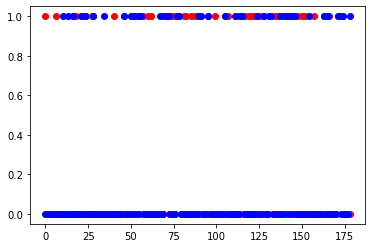

In [19]:
# 5) Perbandingan antara Hasil prediksi variabel survival dan hasil survival yang sebenarnya

plt.scatter(x = list(range(0, len(y_test))), y = y_test, color = 'red')
plt.scatter(x = list(range(0, len(y_pred))), y = y_pred, color = 'blue')

In [20]:
# Dari Plot predicted diatas masih disimpulkan bahwa akurasi baru sampai diangka sekitar 70%